<a href="https://colab.research.google.com/github/thetinybug/Django-Project/blob/master/BlackBox_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Một số biến toàn cục**

##**0.1 Paths**

In [0]:
# Dataset Path
DatasetPath = "/content/drive/My Drive/Study/KLTN/Dataset/NSL-KDD-TM/"

# train_dataset_path = DatasetPath + "Attack-type Labels/SEPARATED/" + "BlackboxTrain.csv"
train_dataset_path = DatasetPath + "Attack-type Labels/PREPROCESSED/" + "KDDTrain+_label_normalized_all.csv"
test_dataset_path = DatasetPath + "Attack-type Labels/PREPROCESSED/" + "KDDTest+_label_normalized_all.csv"

# Save Model Path
SavedModelPath = "/content/drive/My Drive/Study/KLTN/Saved Model/IDSModel/Separated Dataset/"

##**0.2 Variables**

In [0]:
# List Label of DoS Traffic
DOS = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'mailbomb', 'processtable', 'udpstorm', 'apache2', 'worm']

# List Label of U2R Traffic
U2R = ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps']

# List Label of R2L Traffic
R2L = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']

# List Label of U2R and R2L Traffic
U2R_AND_R2L = U2R + R2L

#**1. Chuẩn bị**

##1.1 Import thư viện

###1.1.1. Cài đặt các thư viện cần thiết

In [88]:
!pip3 install numpy sklearn pandas

###1.1.2. Import thư viện

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from datetime import datetime
import pytz

# Define HCM Timezone
time_zone = pytz.timezone('Asia/Ho_Chi_Minh')

##1.2 Định nghĩa hàm tạo Batch, Tiền xử lý dữ liệu

###1.2.1 Tạo Batch

In [0]:
# Hàm tạo Batch
def create_batch1(x,y,batch_size):
    a = list(range(len(x)))
    np.random.shuffle(a)
    x = x[a]
    y = y[a]

    batch_x = [x[batch_size * i : (i+1)*batch_size,:].tolist() for i in range(len(x)//batch_size)]
    batch_y = [y[batch_size * i : (i+1)*batch_size].tolist() for i in range(len(x)//batch_size)]
    return batch_x, batch_y 

###1.2.2 Tiền xử lý dữ liệu

In [0]:
# Hàm tiền xử lý dữ liệu
# ratio: 
#   False - Lấy attack_category traffic và all normal traffic trong dataset
#   True - Lấy attack_category traffic và 1 lượng normal traffic bằng số lượng attack_category
def preprocess_data(dataset, attack_category, ratio = False):
    if attack_category != 'DOS' and attack_category != 'U2R_AND_R2L':
      print(f"Preprocess Data Fail: Invalid Attack Category")
      return (np.array(0), np.array(0))
    
    if attack_category == 'DOS':
      # DOS 
      attack_data = dataset[dataset['class'].isin(DOS)]
    else:
      # U2R_AND_R2L
      attack_data = dataset[dataset['class'].isin(U2R_AND_R2L)]
    
    if ratio == False:
      # Get all Normal Data
      normal_data = dataset[dataset['class'] == 'normal']
    else:
      # Get n Normal Data. n = number record of attack data
      normal_data = dataset[dataset['class'] == 'normal'].head(attack_data.shape[0])
    
    # Combine Data
    combine_data = shuffle(pd.concat([attack_data, normal_data]))

    # Convert class to Binary
    combine_data["class"] = combine_data["class"].map(lambda x : 0 if x == "normal" else 1)

    # separate data and label
    data, label = np.array(combine_data[combine_data.columns[combine_data.columns != "class"]]), np.array(combine_data["class"])
    return data, label

##1.3 Chuẩn bị dataset

In [92]:
#Prepare Dataset

# Load Dataset
train = pd.read_csv(train_dataset_path)
test = pd.read_csv(test_dataset_path)



print(trainx)
print(trainy)

[[0.e+00 1.e+00 4.e+00 ... 0.e+00 1.e+00 1.e+00]
 [0.e+00 1.e+00 9.e+00 ... 1.e+00 0.e+00 0.e+00]
 [0.e+00 3.e+00 2.e+01 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 1.e+00 3.e+00 ... 0.e+00 1.e+00 1.e+00]
 [0.e+00 1.e+00 4.e+00 ... 1.e-02 1.e-02 1.e-02]
 [0.e+00 1.e+00 4.e+00 ... 0.e+00 0.e+00 0.e+00]]
[1 1 0 ... 1 0 0]


In [93]:
#Prepare Dataset

# Load Dataset
train = pd.read_csv(train_dataset_path)
test = pd.read_csv(test_dataset_path)

# # Convert class to Binary
# train["class"] = train["class"].map(lambda x : 0 if x == "normal" else 1)
# test["class"] = test["class"].map(lambda x : 0 if x == "normal" else 1)

# # separate data and class
# trainx, trainy = np.array(train[train.columns[train.columns != "class"]]), np.array(train["class"])
# testx, testy= np.array(test[test.columns[test.columns != "class"]]),np.array(test["class"])

# Preprocess Data
trainx, trainy = preprocess_data(train, 'DOS')
testx, testy = preprocess_data(test, 'DOS')

# batch_size, epoch
batch_size = 1024
max_epoch = 50

# Amount of dataset
n_Train = len(trainx)
n_Test = len(testx)

print("Amout of Train Set:", n_Train)
print("Amout of Test Set:", n_Test)

Amout of Train Set: 113270
Amout of Test Set: 17171


In [94]:
from sklearn.utils import shuffle
df = pd.read_csv(train_dataset_path)
# print(df)

df2 = df[df['class'] == 'normal'].head(10)

df2 = shuffle(df2)

print(df2.shape[0])

10


In [95]:
print(trainx.shape)

(113270, 41)


# **2. Định nghĩa Model**

##2.1. Tạo Model

In [0]:
# Create BlackBoxIDS Model


class Blackbox_IDS(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Blackbox_IDS, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out


# class Blackbox_IDS(nn.Module):
#     def __init__(self,input_dim, output_dim):
#         super().__init__()
#         self.layer = nn.Sequential(
#             #nn.BatchNorm1d(input_dim),
#             nn.Linear(input_dim, input_dim*2),
#             nn.Dropout(0.6),   
#             #nn.ELU(),
#             nn.LeakyReLU(True),
#            # nn.BatchNorm1d(input_dim*2),
#             nn.Linear(input_dim *2, input_dim *2),
#             nn.Dropout(0.5),       
#            # nn.ELU(),
# #            nn.ReLU(True),
#             nn.LeakyReLU(True),   
#           # nn.BatchNorm1d(input_dim*2),
#             nn.Linear(input_dim *2, input_dim//2),
#             nn.Dropout(0.5),       
# #            nn.ReLU(True),
#         #  nn.ELU(),
#             nn.LeakyReLU(True),
#            #nn.BatchNorm1d(input_dim//2),
#             nn.Linear(input_dim//2,input_dim//2),
#             nn.Dropout(0.4),       
#         #    nn.ELU(),
# #            nn.ReLU(True),
#             nn.LeakyReLU(True),
            
#              nn.Linear(input_dim//2,output_dim),
#         )
#         #nn.init.kaiming_normal_(self.layer.weight)
#         self.output = nn.Sigmoid()
#         #self.output = nn.Softmax()
#     def forward(self,x):
#         x = self.layer(x)
#         return x

# Instantiate Model Class
input_dim = trainx.shape[1]     #Number of dimension from dataset
output_dim = 2                  # Label: Anomaly (1), Normaly (0)

# create BlackBoxIDS model
ids_model = Blackbox_IDS(input_dim,output_dim)

# Cross Entropy Loss  
loss_f = nn.CrossEntropyLoss()

# Adam Optimizer 
learning_rate = 0.001
opt = optim.Adam(ids_model.parameters(),lr=learning_rate)

##2.2. Hàm Train, Test

In [0]:
# Train Func
def train(x,y):
    ids_model.train()
    batch_x, batch_y = create_batch1(x,y,batch_size)
    run_loss = 0
    for x,y in zip(batch_x,batch_y):

        ids_model.zero_grad()
        x = V(th.Tensor(x),requires_grad = True)
        y = V(th.LongTensor(y))
        out = ids_model(x)
        loss = loss_f(out,y)

        run_loss += loss.item()
        loss.backward()
        opt.step()
    return run_loss/n_Train

# Test Func
def test(x,y):
    ids_model.eval()
    batch_x, batch_y = create_batch1(x,y,batch_size)
    run_loss = 0
    correct = 0
    
    with th.no_grad():
        for x,y in zip(batch_x,batch_y):
            x = th.Tensor(x)
            y = th.LongTensor(y)
            out = ids_model(x)
            # Calc Loss
            loss = loss_f(out,y)
            run_loss += loss.item()
            # Calc Accuracy
            pred_label = th.argmax(nn.Sigmoid()(out),dim = 1).cpu().numpy()
            tn, _, _, tp = confusion_matrix(y,pred_label).ravel()
            correct = correct + tn + tp
    return (run_loss/n_Test, 100*correct/n_Test)

# **3. Run Model**

In [0]:
# train_loss = train(trainx,trainy)
# test_loss = test(testx,testy)

# x,y = testx,testy
# ids_model.eval()
# batch_x, batch_y = create_batch1(x,y,batch_size)
# run_loss = 0
# correct = 0

# with th.no_grad():
#     for x,y in zip(batch_x,batch_y):
#         x = th.Tensor(x)
#         y = th.LongTensor(y)
#         out = ids_model(x)
#         # Calc Loss
#         loss = loss_f(out,y)
#         run_loss += loss.item()
        
#         # Calc Accuracy
#         pred_label = th.argmax(nn.Sigmoid()(out),dim = 1).cpu().numpy()
#         tn, _, _, tp = confusion_matrix(y,pred_label).ravel()
#         correct = correct + tn + tp

# print(f"Loss: {run_loss/n_Test}\nAccuracy: {correct/n_Test}")


IDS start training
----------------------------------------------------------------------------------------------------
Epoch 		Train Loss 			Test Loss 			Accuracy
1 :		0.0005142844903602745 		0.00045245287407396365 		81.89389086250073
2 :		0.0003246802875136218 		0.00036516383131481646 		82.0278376332188
3 :		0.00023834102807550572 		0.00033295155265781004 		82.01036631529905
4 :		0.00019268759842782783 		0.0003189182185687944 		82.1384893133772
5 :		0.00016506719504512398 		0.00031620345974585 		82.15013685865704
6 :		0.0001469607364576745 		0.00031540335651380157 		82.34814512841419
7 :		0.00013392096209570263 		0.00031927189963871 		82.63933376041
8 :		0.00012429399619595438 		0.0003228024152459488 		82.94799371032555
9 :		0.00011689326930384965 		0.0003325130900466916 		82.97128880088522
10 :		0.00011128443388239246 		0.0003348290659914644 		81.67258750218392
11 :		0.00010679154368641203 		0.0003411081155770646 		81.36392755226836
12 :		0.0001028576605479105 		0.000344462254059751

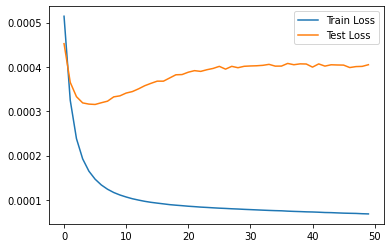

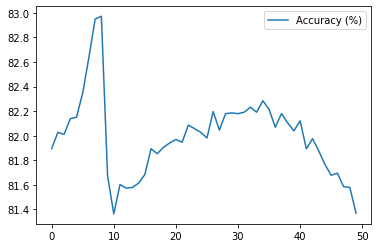

In [99]:
train_losses, test_losses = [],[]
accuracies = []

# Run Model 
print("IDS start training")
print("-"*100)
# print("Epoch \t\tTrain Loss \t\t\tTest Loss")
print("Epoch \t\tTrain Loss \t\t\tTest Loss \t\t\tAccuracy")
for epoch in range(max_epoch):
    train_loss = train(trainx,trainy)
    test_loss, accuracy = test(testx,testy)
    accuracies.append(accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    # print(f"{epoch+1} :\t\t{train_loss} \t\t{test_loss}")    
    print(f"{epoch+1} :\t\t{train_loss} \t\t{test_loss} \t\t{accuracy}")    
print("IDS finished training")

# Save Model & Show Loss Graph
TodayStr = datetime.now(time_zone).strftime("%Y.%m.%d-%H.%M")
# th.save(ids_model.state_dict(), (SavedModelPath + "IDS_" + TodayStr + ".pth"))
plt.plot(train_losses,label = "Train Loss")
plt.plot(test_losses, label = "Test Loss")
plt.legend()
plt.show()

plt.plot(accuracies, label = "Accuracy (%)")
plt.legend()
plt.show()

The Saved Model stored in [Google Drive - BlackBox IDS Model](https://drive.google.com/drive/u/1/folders/1M-xotvruMlkFNaQWPf9bpBpzgPhPLpiH)  
The Result of Code stored in [Github - Thesis](https://github.com/thetinybug/thesis-IDSGAN)